<a href="https://colab.research.google.com/github/DanielChang0528/My-python/blob/master/%E7%A5%9E%E7%B6%93%E7%B6%B2%E8%B7%AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [0]:
import tensorflow as tf

In [0]:
from tensorflow.keras.datasets import fashion_mnist

In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Shirt


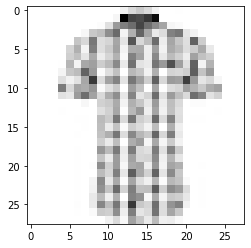

In [0]:
n = 1978
print( class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys');

In [0]:
x_train = x_train / 255
x_test = x_test / 255

In [0]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
y_train = to_categorical(y_train, 10)

In [0]:
y_test = to_categorical(y_test, 10)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [0]:
model = Sequential()

In [0]:
model.add(Dense(88, input_dim = 784, activation = 'relu'))

In [0]:
model.add(Dense(821, activation = 'relu'))

In [0]:
model.add(Dense(325, activation = 'relu'))

In [0]:
model.add(Dense(10, activation = 'softmax'))

In [0]:
model.compile(loss = 'mse', optimizer = SGD(lr = 0.03), metrics = ['accuracy'])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 88)                69080     
_________________________________________________________________
dense_1 (Dense)              (None, 821)               73069     
_________________________________________________________________
dense_2 (Dense)              (None, 325)               267150    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                3260      
Total params: 412,559
Trainable params: 412,559
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit(x_train, y_train, batch_size=150, epochs=15)

Epoch 1/15
400/400 [==============================] - 4s 10ms/step - loss: 0.0887 - accuracy: 0.1426
Epoch 2/15
400/400 [==============================] - 4s 10ms/step - loss: 0.0857 - accuracy: 0.3134
Epoch 3/15
400/400 [==============================] - 4s 11ms/step - loss: 0.0807 - accuracy: 0.4250
Epoch 4/15
400/400 [==============================] - 4s 10ms/step - loss: 0.0719 - accuracy: 0.5187
Epoch 5/15
400/400 [==============================] - 4s 10ms/step - loss: 0.0616 - accuracy: 0.6229
Epoch 6/15
400/400 [==============================] - 4s 10ms/step - loss: 0.0533 - accuracy: 0.6545
Epoch 7/15
400/400 [==============================] - 4s 10ms/step - loss: 0.0478 - accuracy: 0.6644
Epoch 8/15
400/400 [==============================] - 4s 10ms/step - loss: 0.0443 - accuracy: 0.6753
Epoch 9/15
400/400 [==============================] - 4s 10ms/step - loss: 0.0419 - accuracy: 0.6933
Epoch 10/15
400/400 [==============================] - 4s 10ms/step - loss: 0.0399 - accura

In [0]:
result = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


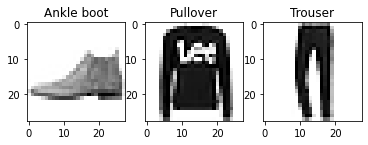

In [0]:
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='Greys')
    plt.title(class_names[result[i]])